In [1]:
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import pandas_datareader as pdr
import datetime
import yfinance as yf
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:


# Define the date range

start_date = datetime.datetime(2020,1,1)

end_date =datetime.datetime(2024,1,1)

# Fetch historial Euro USD Exchange Rate Data

EURUSD = pdr.get_data_fred("DEXUSEU",start = start_date, end = end_date)
GBPUSD = pdr.get_data_fred("DEXUSUK",start = start_date, end = end_date)
USDJPY = pdr.get_data_fred("DEXJPUS", start = start_date, end = end_date)
AUDUSD = pdr.get_data_fred("DEXUSAL", start = start_date, end = end_date)
USDCAD = pdr.get_data_fred("DEXCAUS", start = start_date, end = end_date)
USDCHF = pdr.get_data_fred("DEXSZUS", start = start_date, end = end_date)
USD = yf.download("DX-Y,NYB", start = start_date, end = end_date)[["Close"]]


display(EURUSD)
display(GBPUSD)
display(USDJPY)
display(AUDUSD)
display(USDCAD)
display(USDCHF)
display(USD)




[*********************100%%**********************]  2 of 2 completed


2 Failed downloads:
['NYB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 00:00:00 -> 2024-01-01 00:00:00)')
['DX-Y']: Exception('%ticker%: No timezone found, symbol may be delisted')


,DEXUSEU
DATE,
2020-01-01,NaN
2020-01-02,1.1166
2020-01-03,1.1173
2020-01-06,1.1187
2020-01-07,1.1138
...,...
2023-10-09,NaN
2023-10-10,1.0618
2023-10-11,1.0620


,DEXUSUK
DATE,
2020-01-01,NaN
2020-01-02,1.3128
2020-01-03,1.3091
2020-01-06,1.3163
2020-01-07,1.3127
...,...
2023-10-09,NaN
2023-10-10,1.2288
2023-10-11,1.2304


,DEXJPUS
DATE,
2020-01-01,NaN
2020-01-02,108.43
2020-01-03,107.94
2020-01-06,108.36
2020-01-07,108.53
...,...
2023-10-09,NaN
2023-10-10,148.62
2023-10-11,149.17


,DEXUSAL
DATE,
2020-01-01,NaN
2020-01-02,0.6982
2020-01-03,0.6963
2020-01-06,0.6932
2020-01-07,0.6861
...,...
2023-10-09,NaN
2023-10-10,0.6430
2023-10-11,0.6407


,DEXCAUS
DATE,
2020-01-01,NaN
2020-01-02,1.2998
2020-01-03,1.2985
2020-01-06,1.2964
2020-01-07,1.3016
...,...
2023-10-09,NaN
2023-10-10,1.3579
2023-10-11,1.3617


,DEXSZUS
DATE,
2020-01-01,NaN
2020-01-02,0.9721
2020-01-03,0.9703
2020-01-06,0.9688
2020-01-07,0.9716
...,...
2023-10-09,NaN
2023-10-10,0.9039
2023-10-11,0.9025


Empty DataFrame
Columns: [(Close, DX-Y), (Close, NYB)]
Index: []

In [4]:
# Concatenate Forex data into singular dataframe

exchange_rates = pd.concat([EURUSD, GBPUSD, USDJPY, USDCAD, USDCHF, AUDUSD], axis = 1)

# Display exchange rate dataframe

exchange_rates

,DEXUSEU,DEXUSUK,DEXJPUS,DEXCAUS,DEXSZUS,DEXUSAL
DATE,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.1166,1.3128,108.43,1.2998,0.9721,0.6982
2020-01-03,1.1173,1.3091,107.94,1.2985,0.9703,0.6963
2020-01-06,1.1187,1.3163,108.36,1.2964,0.9688,0.6932
2020-01-07,1.1138,1.3127,108.53,1.3016,0.9716,0.6861
...,...,...,...,...,...,...
2023-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-10,1.0618,1.2288,148.62,1.3579,0.9039,0.6430
2023-10-11,1.0620,1.2304,149.17,1.3617,0.9025,0.6407


In [5]:
# Check null values

exchange_rates.isna().sum()

DEXUSEU    42
DEXUSUK    42
DEXJPUS    42
DEXCAUS    42
DEXSZUS    42
DEXUSAL    42
dtype: int64

In [6]:
# Drop null values

exchange_rates.dropna(inplace=True)


In [7]:
# Recheck null values to ensure nulls are dropped

exchange_rates.isna().sum()

DEXUSEU    0
DEXUSUK    0
DEXJPUS    0
DEXCAUS    0
DEXSZUS    0
DEXUSAL    0
dtype: int64

In [8]:
# Calculate mean for each currency pair/index
averages = exchange_rates.mean()

In [9]:
# Rename columns
exchange_rates = exchange_rates.rename(columns={
    "DEXUSEU": "EUR/USD",
    "DEXUSUK": "GBP/USD",
    "DEXJPUS": "USD/JPY",
    "DEXCAUS": "USD/CAD",
    "DEXSZUS": "USD/CHF",
    "DEXUSAL": "AUD/USD", 
    "Close": "USD"
})

# Display output
exchange_rates

,EUR/USD,GBP/USD,USD/JPY,USD/CAD,USD/CHF,AUD/USD
DATE,,,,,,
2020-01-02,1.1166,1.3128,108.43,1.2998,0.9721,0.6982
2020-01-03,1.1173,1.3091,107.94,1.2985,0.9703,0.6963
2020-01-06,1.1187,1.3163,108.36,1.2964,0.9688,0.6932
2020-01-07,1.1138,1.3127,108.53,1.3016,0.9716,0.6861
2020-01-08,1.1117,1.3110,109.03,1.3026,0.9725,0.6870
...,...,...,...,...,...,...
2023-10-06,1.0596,1.2255,149.08,1.3657,0.9082,0.6394
2023-10-10,1.0618,1.2288,148.62,1.3579,0.9039,0.6430
2023-10-11,1.0620,1.2304,149.17,1.3617,0.9025,0.6407


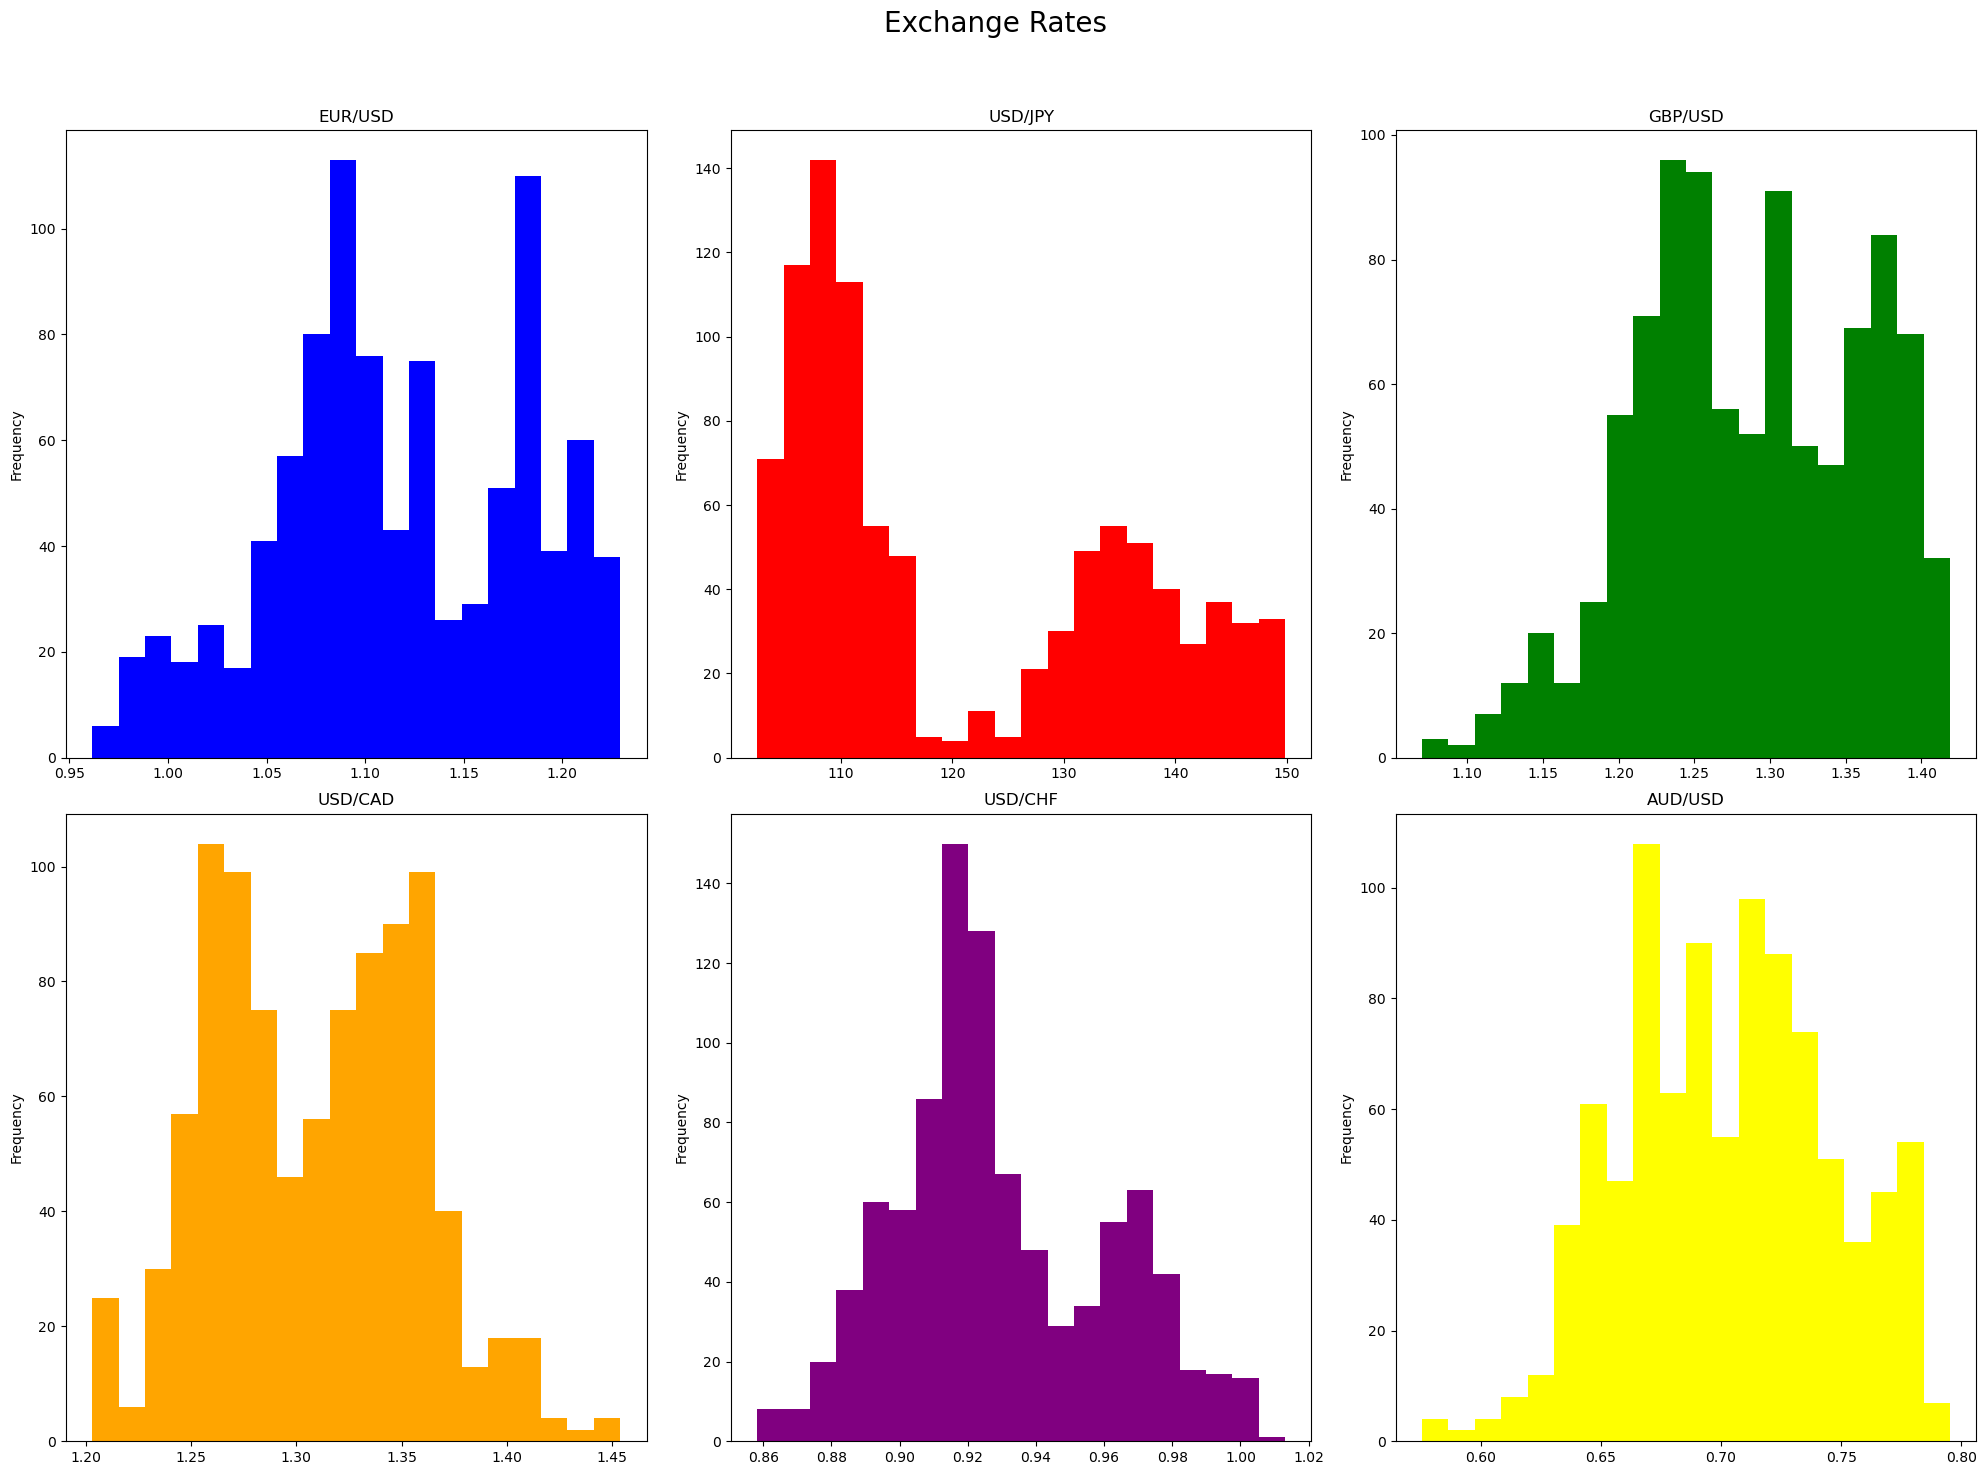

In [29]:
# Specify subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[20, 15])
fig.suptitle("Exchange Rates", fontsize=20)


# Create histograms for each exchange rate pair
axes[0, 0].hist(exchange_rates["EUR/USD"], color="blue", bins=20)
axes[0, 1].hist(exchange_rates["USD/JPY"], color="red", bins=20)
axes[0, 2].hist(exchange_rates["GBP/USD"], color="green", bins=20)
axes[1, 0].hist(exchange_rates["USD/CAD"], color="orange", bins=20)
axes[1, 1].hist(exchange_rates["USD/CHF"], color="purple", bins=20)
axes[1, 2].hist(exchange_rates["AUD/USD"], color="yellow", bins=20)


# Set titles for subplots
axes[0, 0].set_title("EUR/USD")
axes[0, 1].set_title("USD/JPY")
axes[0, 2].set_title("GBP/USD")
axes[1, 0].set_title("USD/CAD")
axes[1, 1].set_title("USD/CHF")
axes[1, 2].set_title("AUD/USD")


# Set common y axes label
for ax in axes.flat:
    ax.set_ylabel("Frequency")


# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)


# Show plot
plt.show()

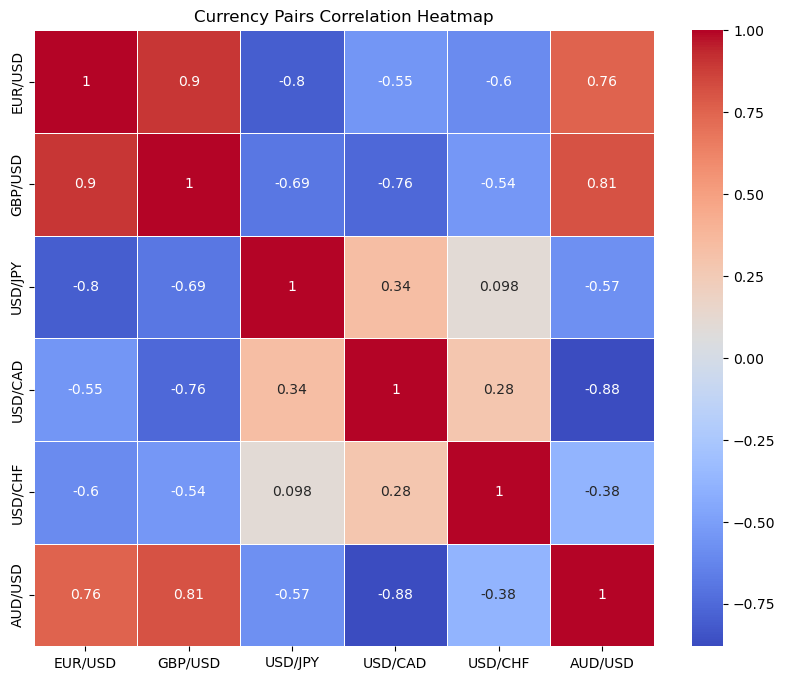

In [32]:
#Calculate correlation matrix
corr_matrix = exchange_rates.corr()

#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Currency Pairs Correlation Heatmap")
plt.show()

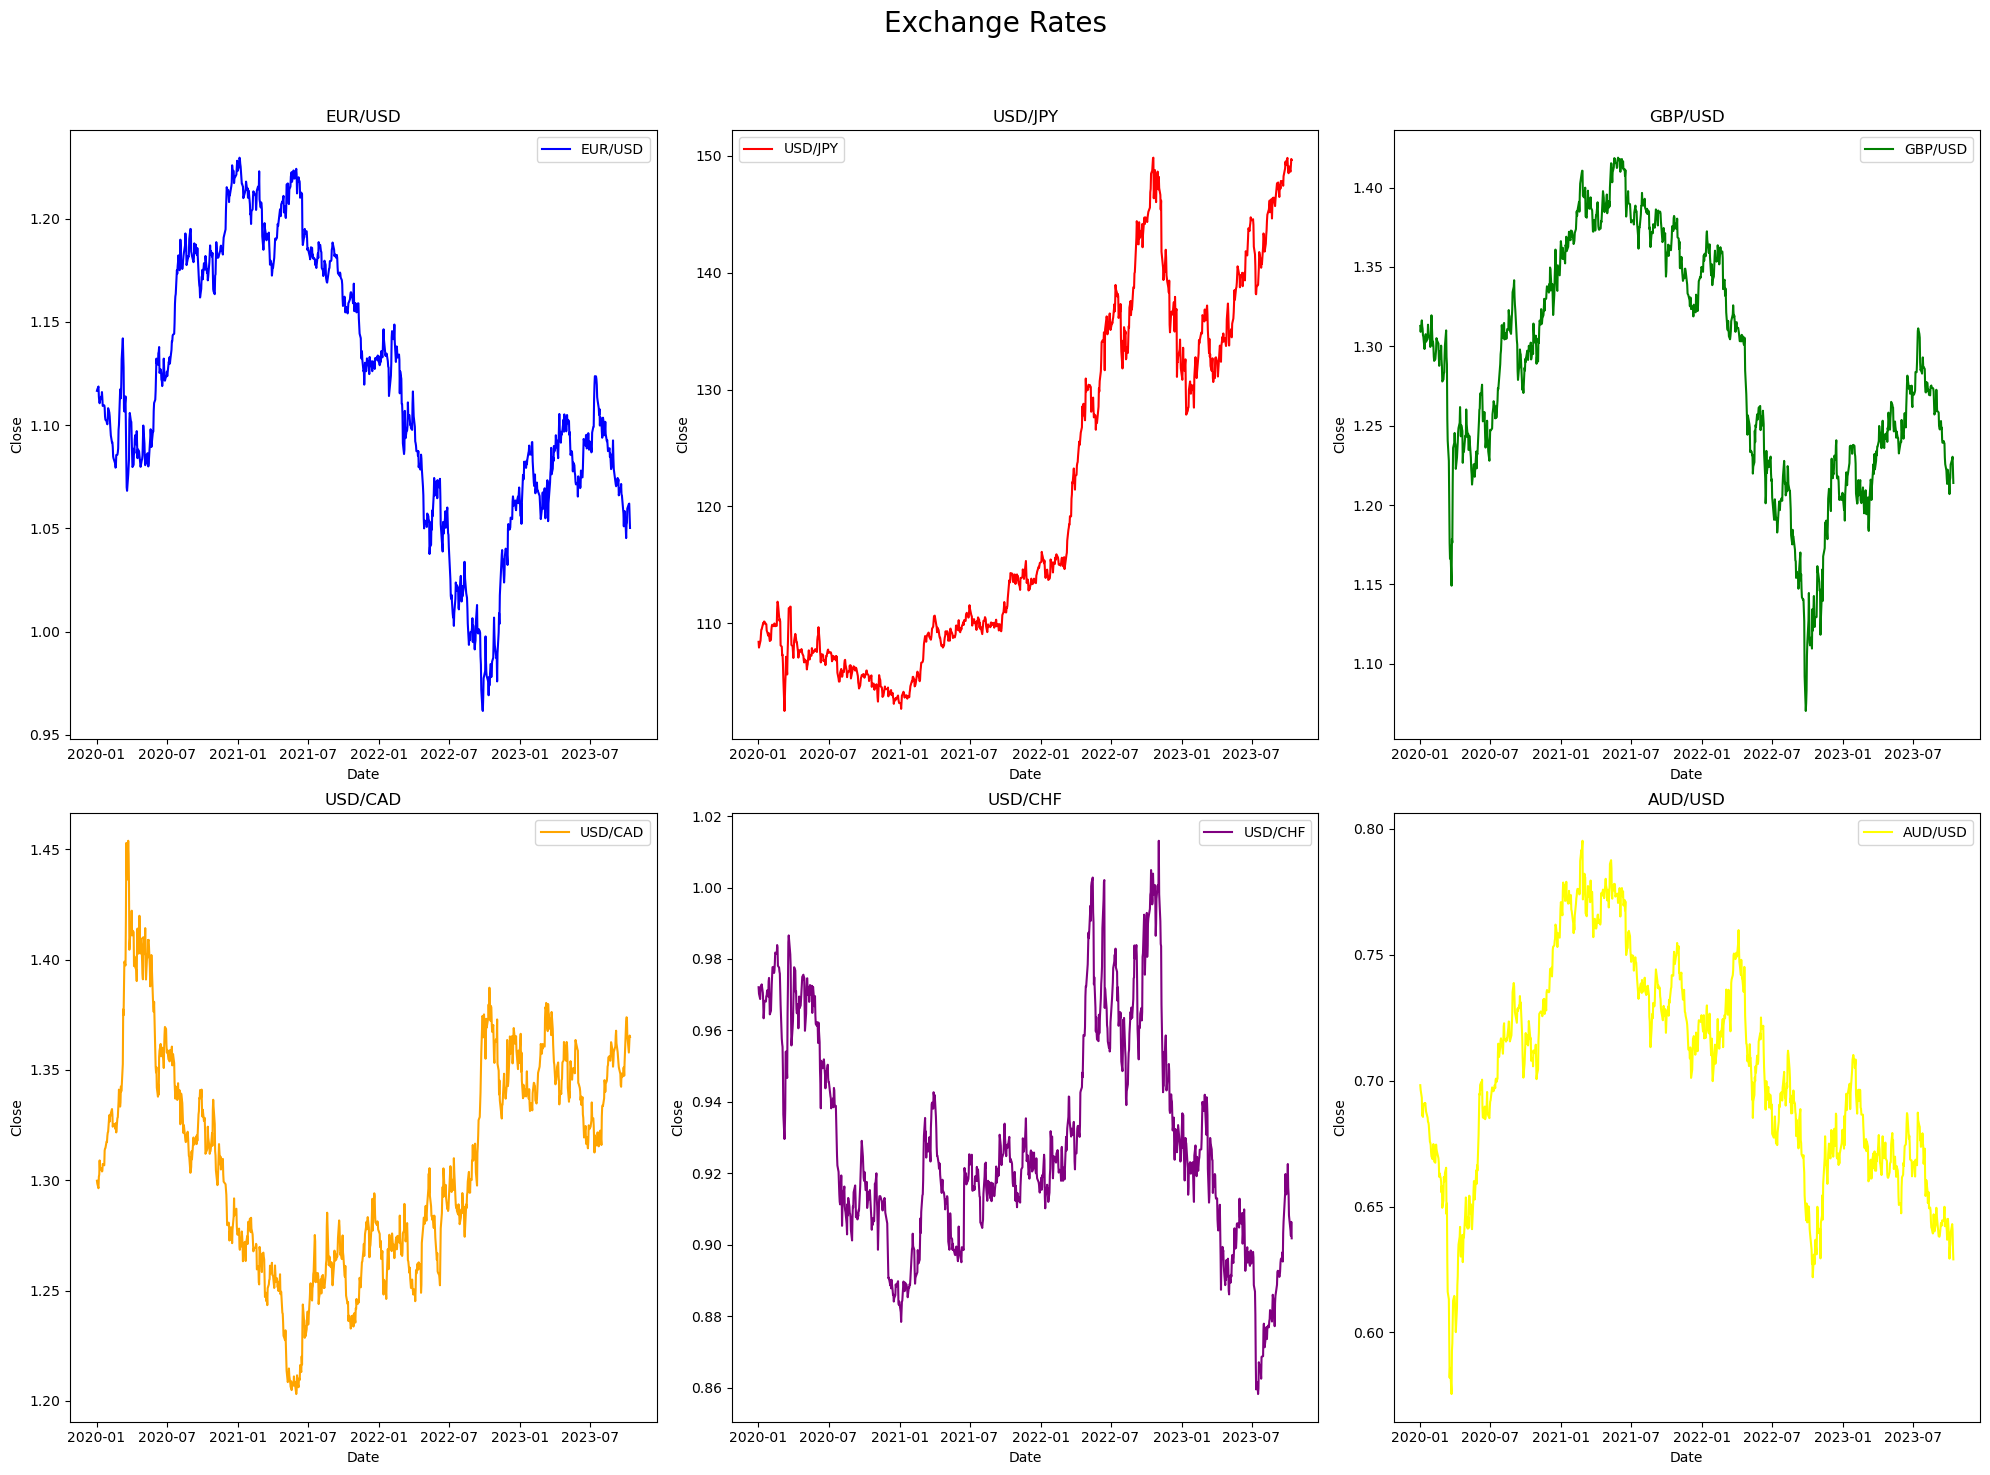

In [11]:
# Specify subplot grid
fig , axes = plt.subplots(nrows = 2 , ncols = 3, figsize = [20,15])
fig.suptitle("Exchange Rates" , fontsize = 20)
axes[0,0].plot(exchange_rates["EUR/USD"], color = "blue" , label = "EUR/USD")
axes[0,1].plot(exchange_rates["USD/JPY"], color = "red" , label = "USD/JPY")
axes[0,2].plot(exchange_rates["GBP/USD"], color = "green" , label = "GBP/USD")
axes[1,0].plot(exchange_rates["USD/CAD"], color = "orange" , label = "USD/CAD")
axes[1,1].plot(exchange_rates["USD/CHF"], color = "purple" , label = "USD/CHF")
axes[1,2].plot(exchange_rates["AUD/USD"], color = "yellow" , label = "AUD/USD")

# Set titles for subplots
axes[0,0].set_title("EUR/USD")
axes[0,1].set_title("USD/JPY") 
axes[0,2].set_title("GBP/USD")
axes[1,0].set_title("USD/CAD")
axes[1,1].set_title("USD/CHF")
axes[1,2].set_title("AUD/USD")

# Set common x and y axes labels

for ax in axes.flat:
    ax.set_xlabel("Date")
    ax.set_ylabel("Close")

# Set legends
axes[0,0].legend()
axes[0,1].legend()
axes[0,2].legend()
axes[1,0].legend()
axes[1,1].legend()
axes[1,2].legend()

# Adjust layout

plt.tight_layout()
plt.subplots_adjust(top = 0.9)
# Show plot

plt.show()

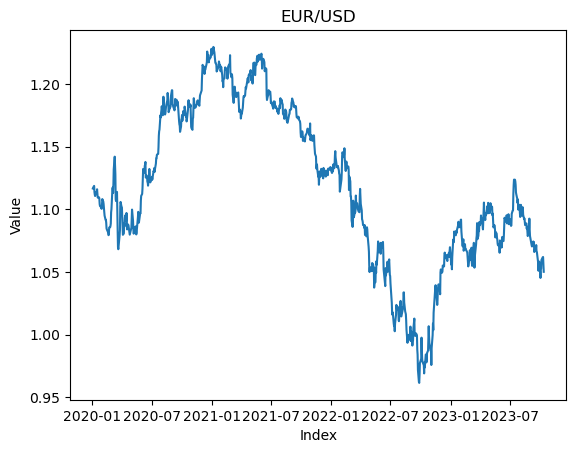

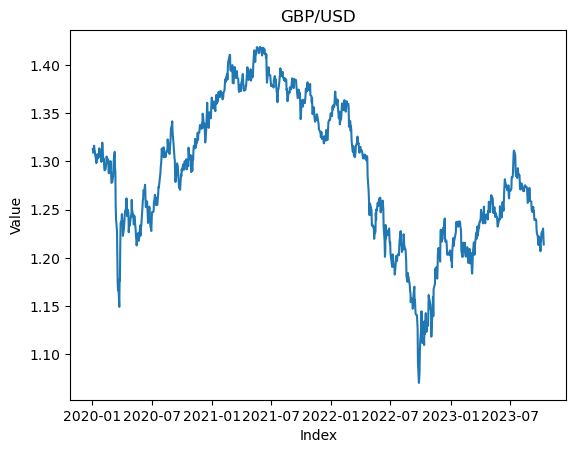

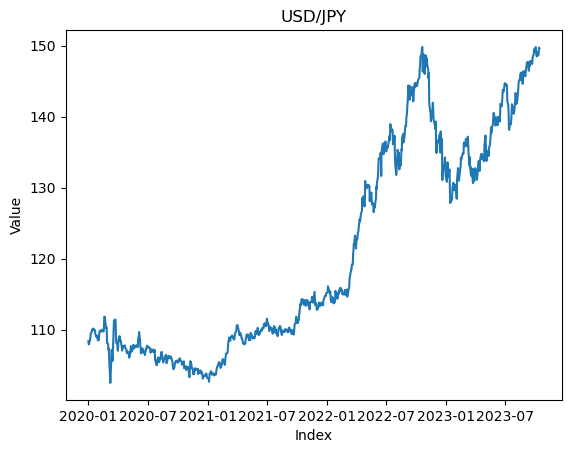

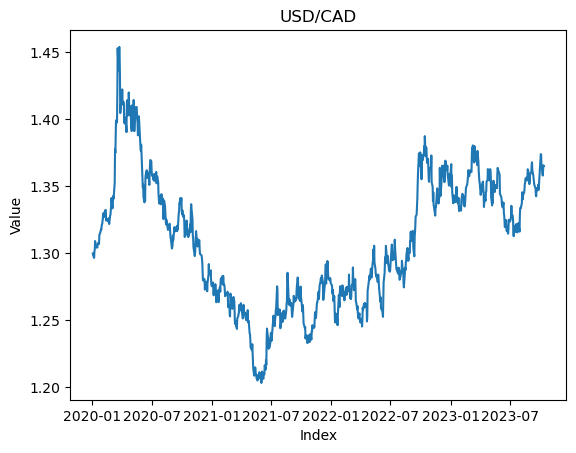

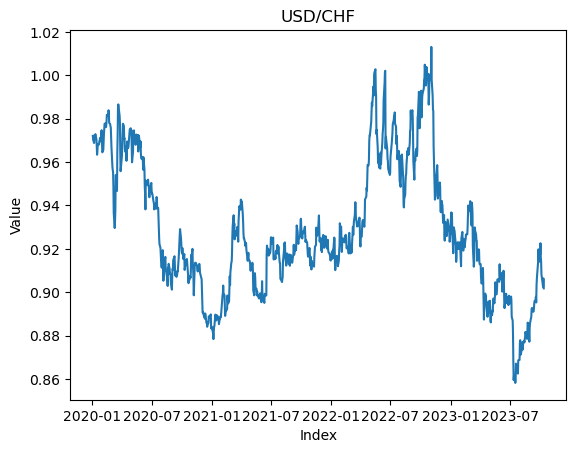

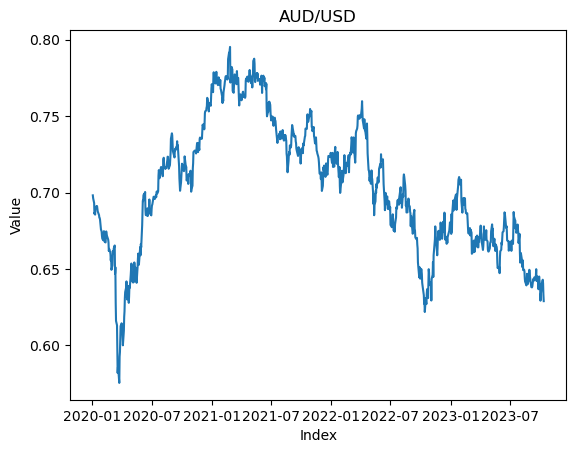

In [12]:
# Write a for loop to iterate
for forex in exchange_rates.columns :
    # Create new figure for each plot
    plt.figure()
    # Set the title to respective column name
    plt.title(forex)
    # Plot the Forex data
    plt.plot(exchange_rates[forex])
    # Set x axis
    plt.xlabel("Index")
    # Set y axis
    plt.ylabel("Value")
    

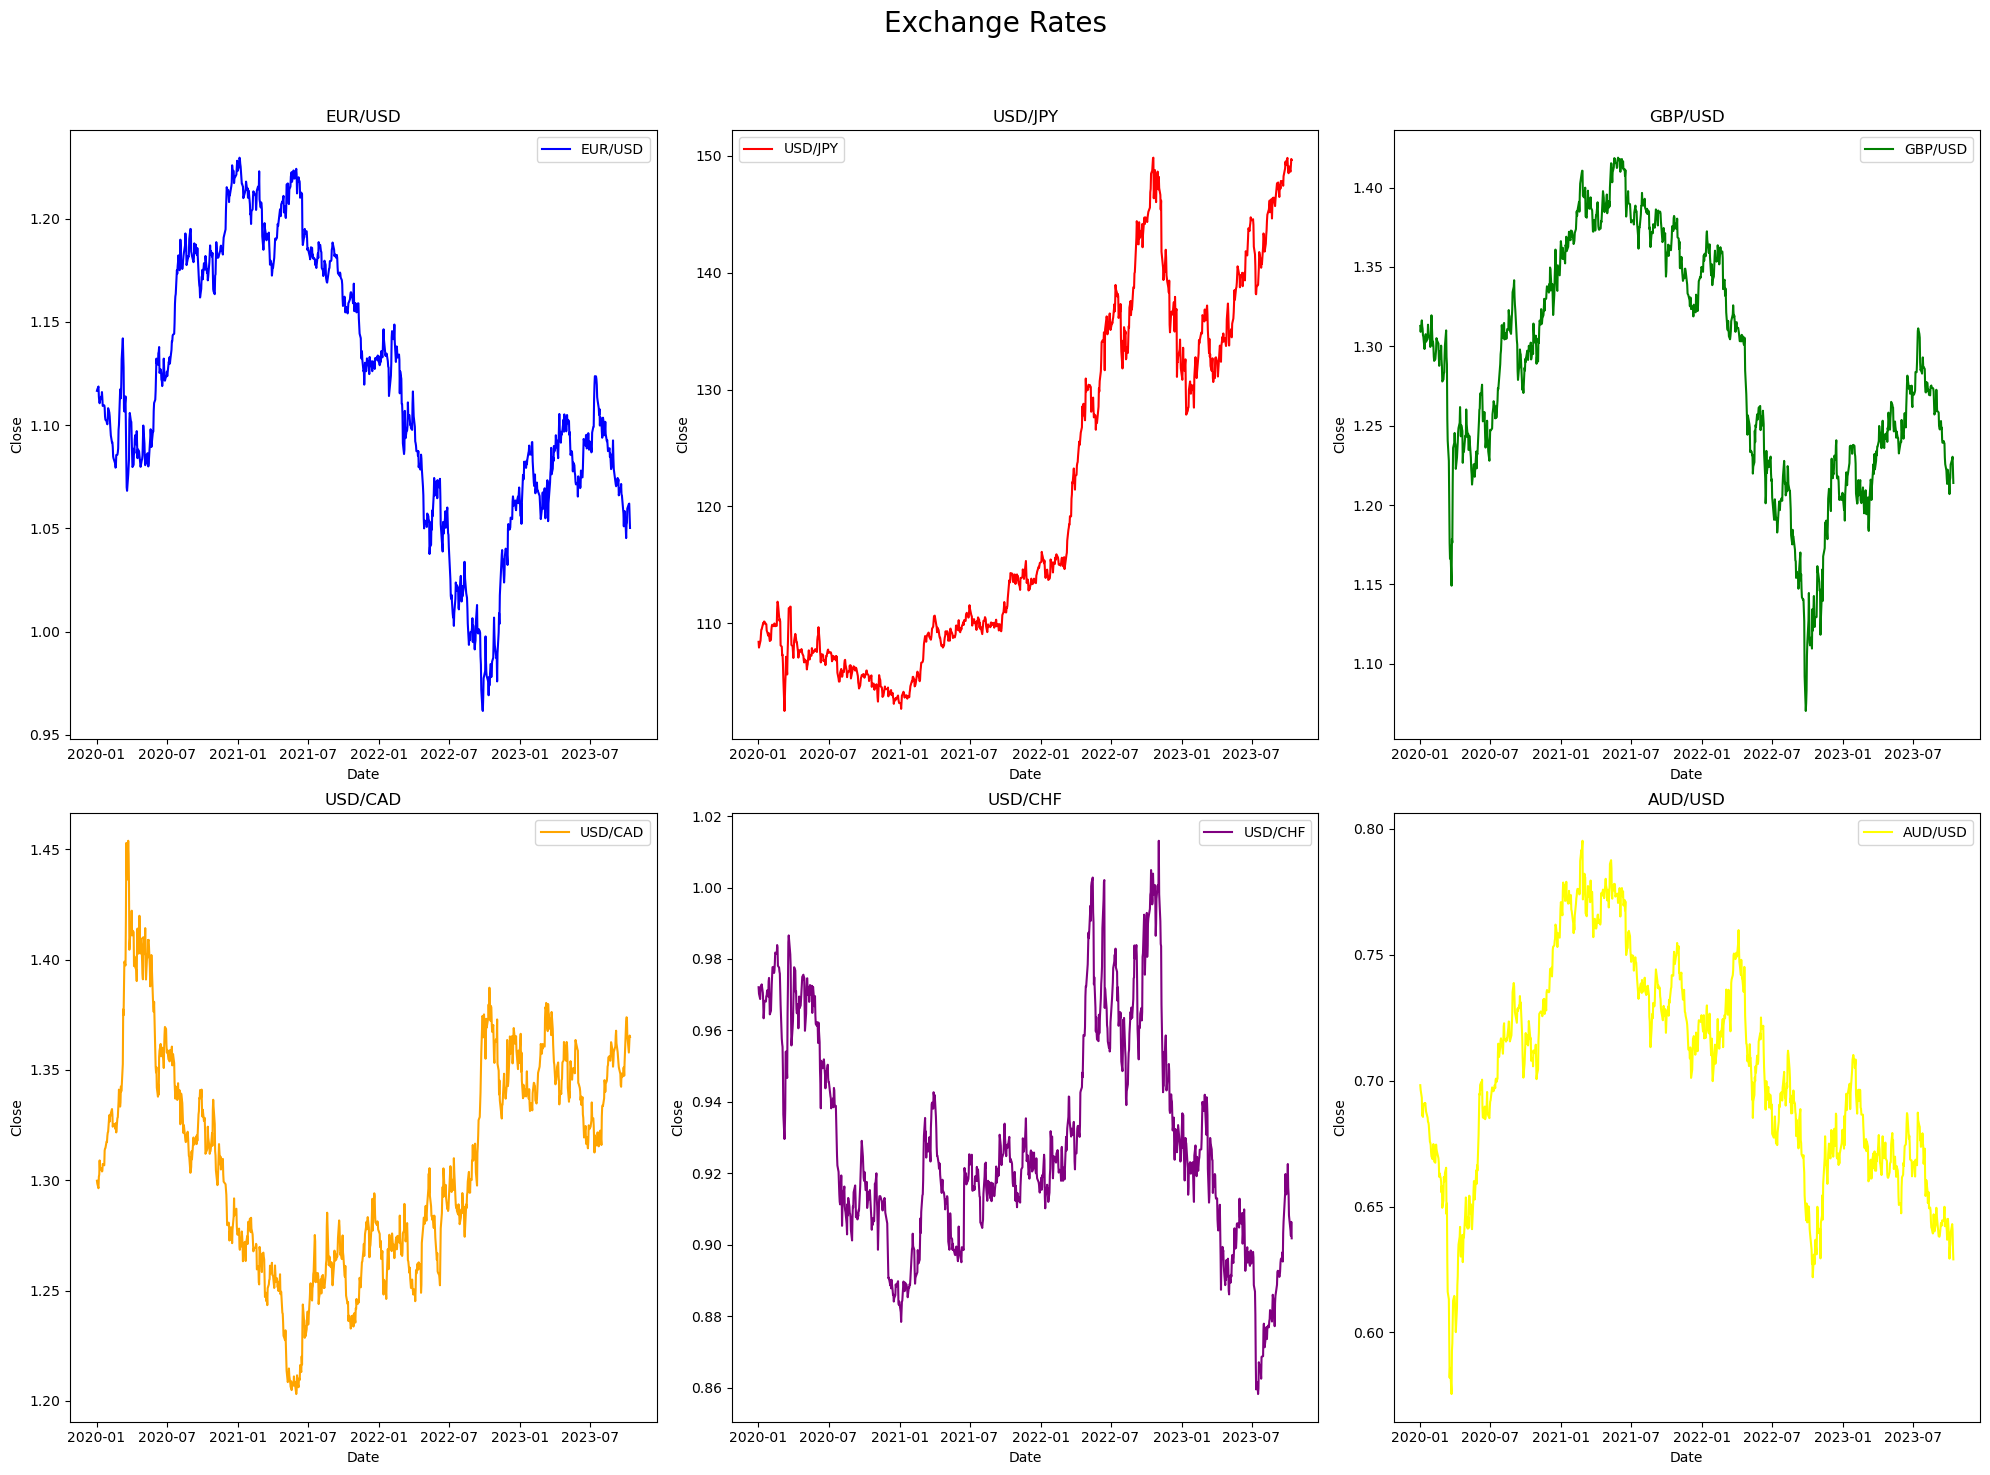

In [13]:
# Specify subplot grid
fig , axes = plt.subplots(nrows = 2 , ncols = 3, figsize = [20,15])
fig.suptitle("Exchange Rates" , fontsize = 20)
axes[0,0].plot(exchange_rates["EUR/USD"], color = "blue" , label = "EUR/USD")
axes[0,1].plot(exchange_rates["USD/JPY"], color = "red" , label = "USD/JPY")
axes[0,2].plot(exchange_rates["GBP/USD"], color = "green" , label = "GBP/USD")
axes[1,0].plot(exchange_rates["USD/CAD"], color = "orange" , label = "USD/CAD")
axes[1,1].plot(exchange_rates["USD/CHF"], color = "purple" , label = "USD/CHF")
axes[1,2].plot(exchange_rates["AUD/USD"], color = "yellow" , label = "AUD/USD")

# Set titles for subplots
axes[0,0].set_title("EUR/USD")
axes[0,1].set_title("USD/JPY") 
axes[0,2].set_title("GBP/USD")
axes[1,0].set_title("USD/CAD")
axes[1,1].set_title("USD/CHF")
axes[1,2].set_title("AUD/USD")

# Set common x and y axes labels

for ax in axes.flat:
    ax.set_xlabel("Date")
    ax.set_ylabel("Close")

# Set legends
axes[0,0].legend()
axes[0,1].legend()
axes[0,2].legend()
axes[1,0].legend()
axes[1,1].legend()
axes[1,2].legend()

# Adjust layout

plt.tight_layout()
plt.subplots_adjust(top = 0.9)
# Show plot

plt.show()




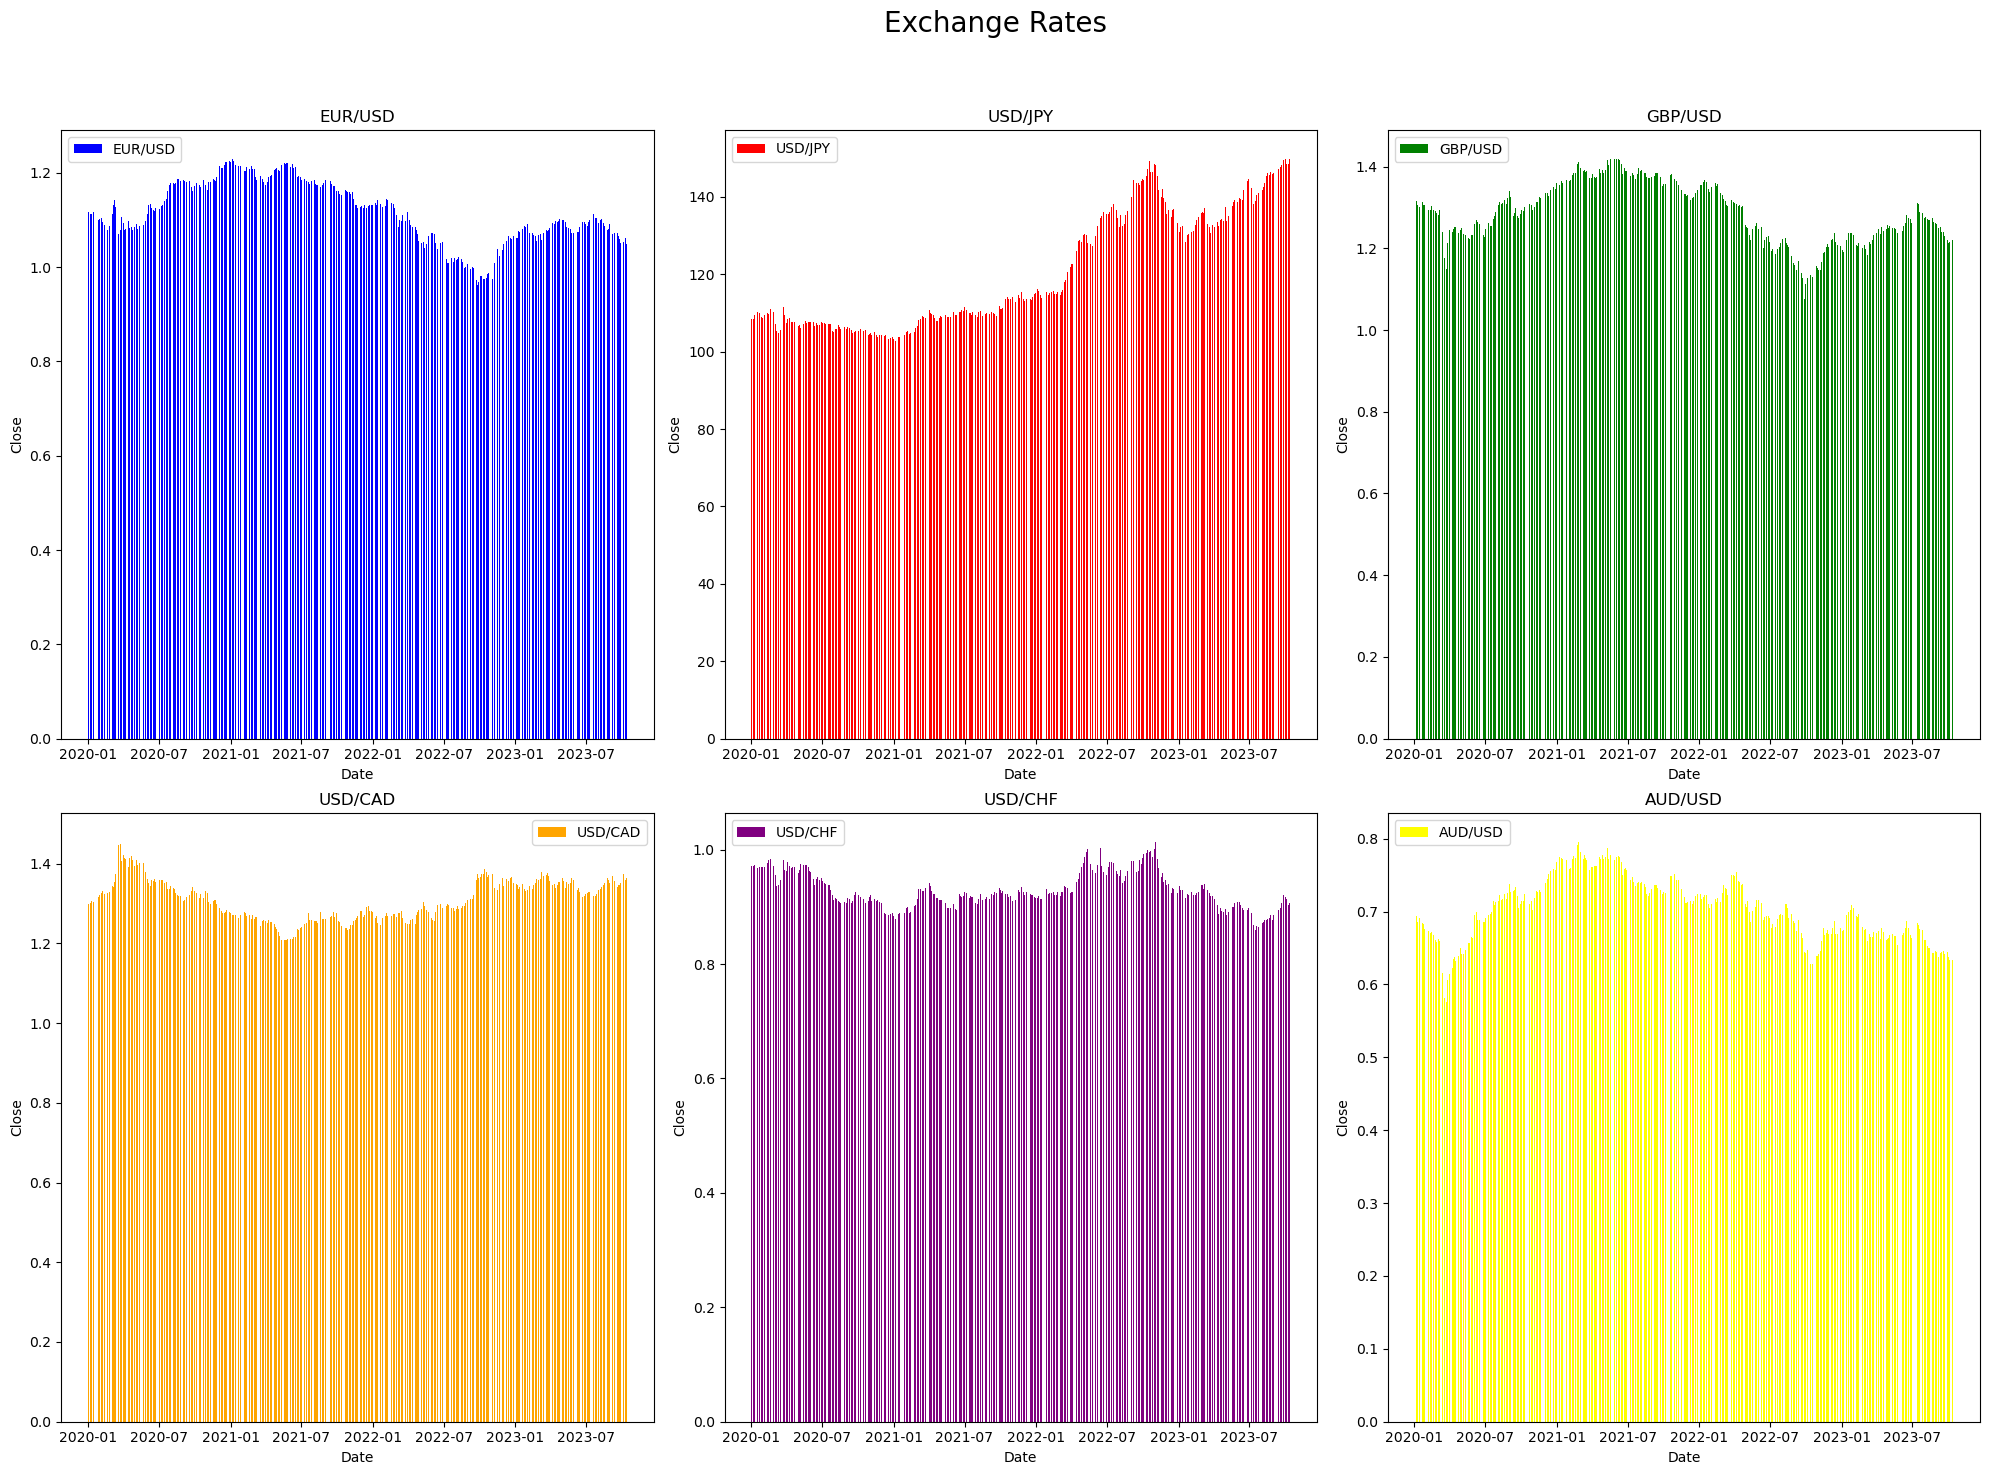

In [28]:
# Specify subplot grid
fig , axes = plt.subplots(nrows = 2 , ncols = 3, figsize = [20,15])
fig.suptitle("Exchange Rates" , fontsize = 20)
axes[0,0].bar(exchange_rates.index,exchange_rates["EUR/USD"], color = "blue" , label = "EUR/USD")
axes[0,1].bar(exchange_rates.index,exchange_rates["USD/JPY"], color = "red" , label = "USD/JPY")
axes[0,2].bar(exchange_rates.index,exchange_rates["GBP/USD"], color = "green" , label = "GBP/USD")
axes[1,0].bar(exchange_rates.index,exchange_rates["USD/CAD"], color = "orange" , label = "USD/CAD")
axes[1,1].bar(exchange_rates.index,exchange_rates["USD/CHF"], color = "purple" , label = "USD/CHF")
axes[1,2].bar(exchange_rates.index,exchange_rates["AUD/USD"], color = "yellow" , label = "AUD/USD")

# Set titles for subplots
axes[0,0].set_title("EUR/USD")
axes[0,1].set_title("USD/JPY") 
axes[0,2].set_title("GBP/USD")
axes[1,0].set_title("USD/CAD")
axes[1,1].set_title("USD/CHF")
axes[1,2].set_title("AUD/USD")

# Set common x and y axes labels

for ax in axes.flat:
    ax.set_xlabel("Date")
    ax.set_ylabel("Close")

# Set legends
axes[0,0].legend()
axes[0,1].legend()
axes[0,2].legend()
axes[1,0].legend()
axes[1,1].legend()
axes[1,2].legend()

# Adjust layout

plt.tight_layout()
plt.subplots_adjust(top = 0.9)
# Show plot

plt.show()




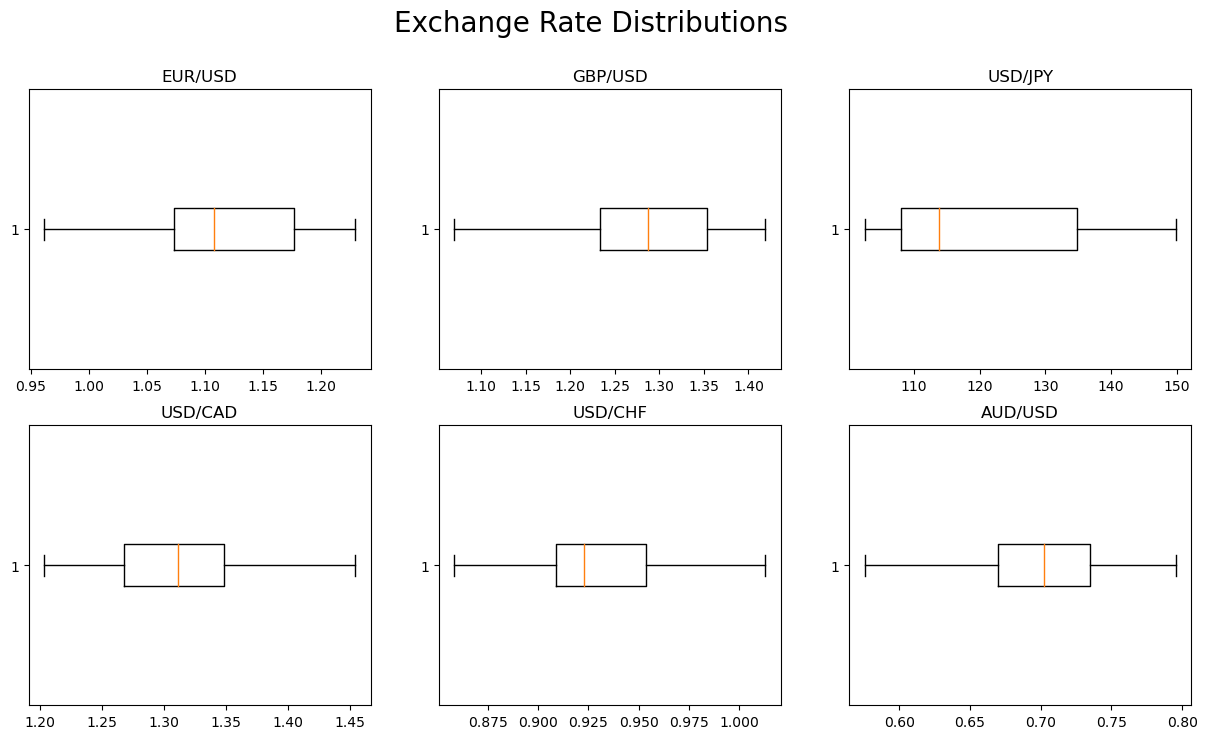

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Exchange Rate Distributions", fontsize=20)

for i, (currency, color) in enumerate(zip(exchange_rates.columns, ["blue", "red", "green", "orange", "purple", "yellow"])):
    axes[i // 3, i % 3].boxplot(exchange_rates[currency], vert=False)
    axes[i // 3, i % 3].set_title(currency)
    
plt.show()


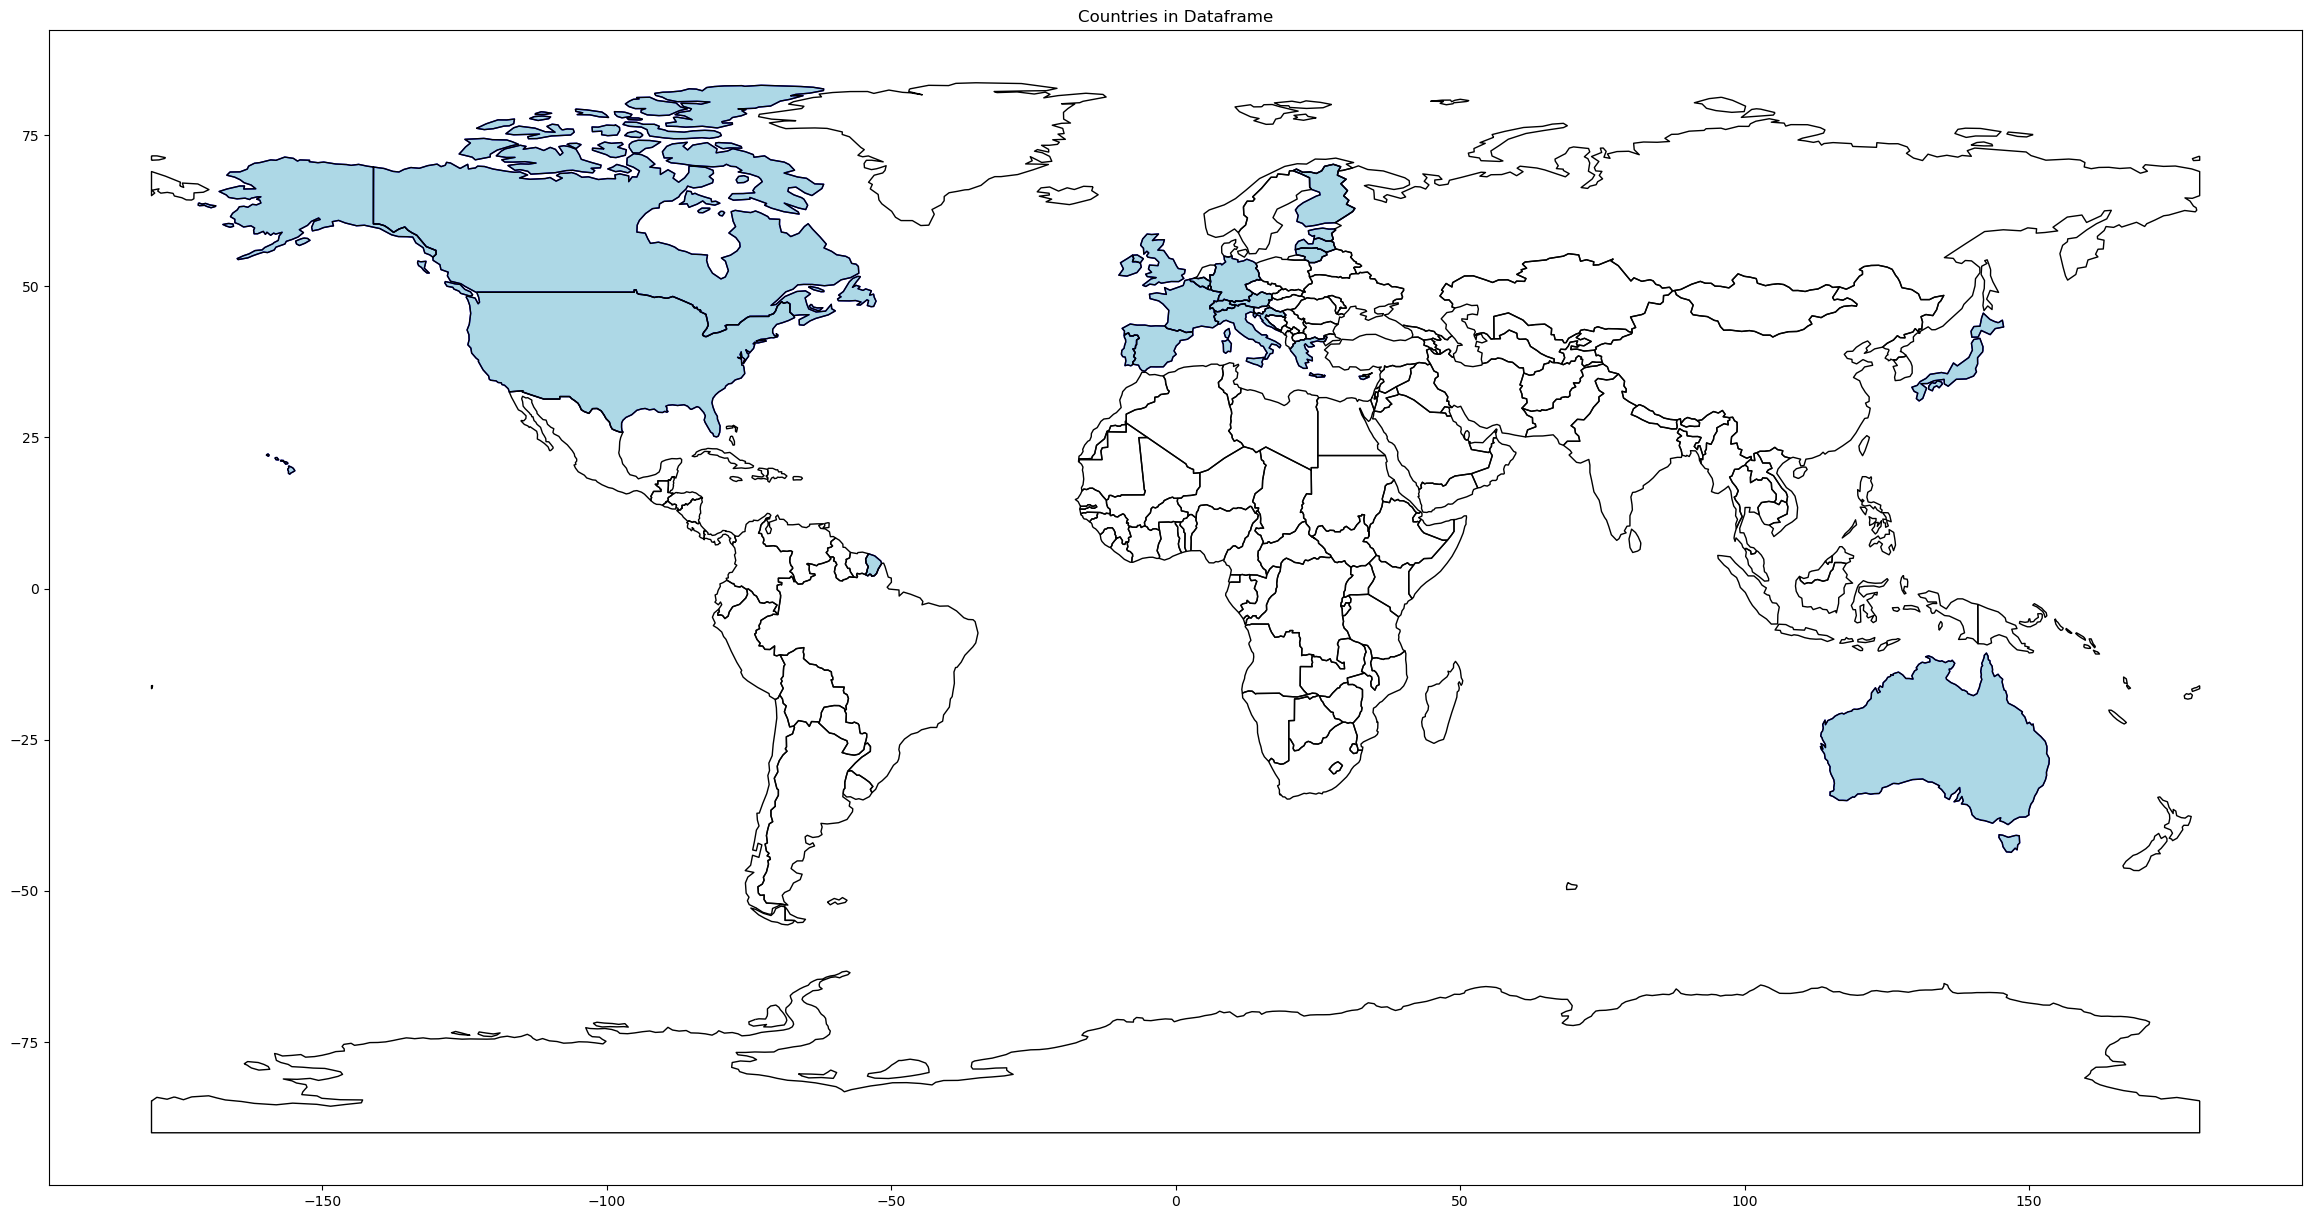

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
# Suppress all future warnings
warnings.filterwarnings("ignore")

# Load a world map shapefile using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = world[world['name'].isin(['United States of America', 'Spain', 'Austria', 'Belgium', 'Ireland', 'Lithuania', 'Luxemborg', 'Croatia', 'Cyprus', 'Estonia', 'Finland', 'Greece', 'Latvia', 'Portugal', 'France', 'Germany', 'Italy', 'United Kingdom', 'Canada', 'Japan', 'Australia', 'Switzerland'])]

# Plot the selected countries on the map
fig, ax = plt.subplots(figsize=(35, 15))
world.boundary.plot(ax=ax, linewidth=1, color='k')
countries.plot(ax=ax, color='lightblue', edgecolor='blue')

# Add country names
# for x, y, label in zip(countries.geometry.centroid.x, countries.geometry.centroid.y, countries['name']):
    # ax.text(x, y, label, fontsize=12, ha='center', va='center')

ax.set_title("Countries in Dataframe")
plt.show()


In [ ]:
pip install geopandas

In [ ]:
pip install pandas-datareader